In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

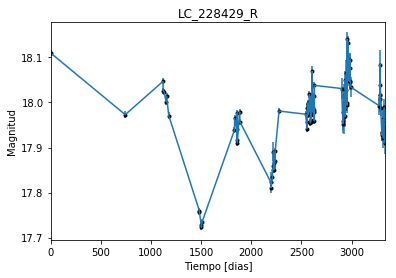

In [2]:
data = np.genfromtxt('LC_228429_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_228429_R')
plt.savefig("LC_228429_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

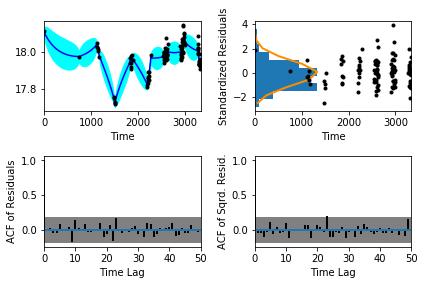

In [5]:
sample.assess_fit()

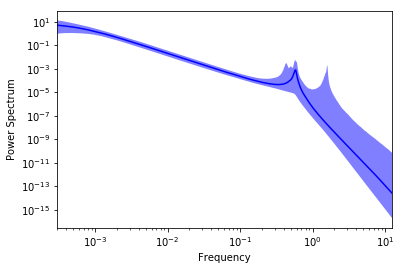

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

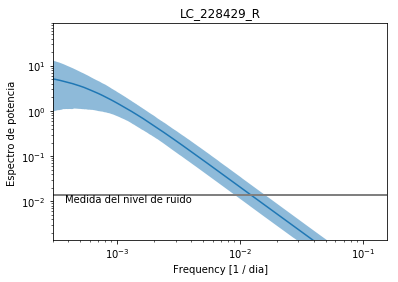

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_228429_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_228429_R')

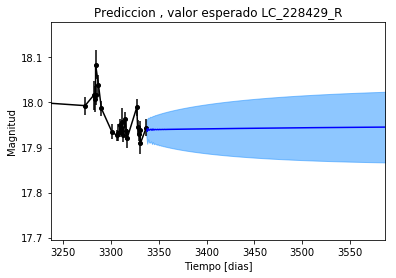

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_228429_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_228429_R')

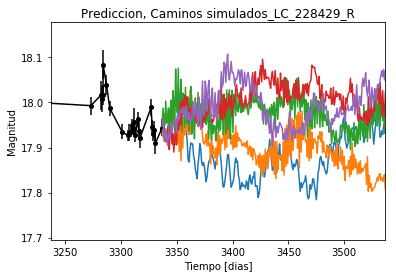

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_228429_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


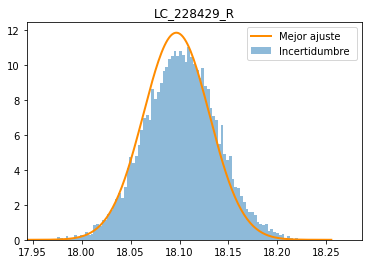

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_228429_R')
plt.savefig("Mejor_ajuste_LC_228429_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_228429_R')

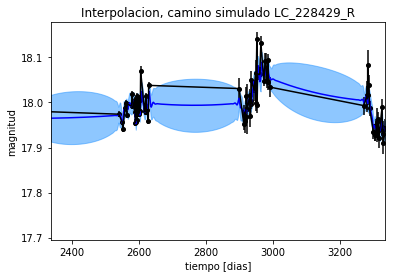

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_228429_R')

Text(0.5,1,'Interpolacion, camino simulado LC_228429_R')

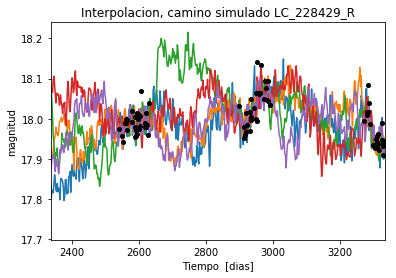

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_228429_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1617.15862987
Median: 0.0143187611599
Standard deviation: 0.859241021492
68% credibility interval: [ 0.00949093  0.02511901]
95% credibility interval: [ 0.00611151  0.07613767]
99% credibility interval: [ 0.00449784  0.72446699]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 2206.30327232
Median: 0.0143187611599
Standard deviation: 0.75345041259
68% credibility interval: [ 0.00949093  0.02511901]
95% credibility interval: [ 0.00611151  0.07613767]
99% credibility interval: [ 0.00449784  0.46428045]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 729.417483282
Median: 5.65707864815
Standard deviation: 6.60940805736
68% credib

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 359.761222931
Median: 306.959601695
Standard deviation: 2.2246118372
68% credibility interval: [ 304.55794885  308.85903169]
95% credibility interval: [ 301.94577612  310.79089286]
99% credibility interval: [ 300.02114292  311.58321206]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 646.028425977
Median: 36.0383980324
Standard deviation: 42.3645985928
68% credibility interval: [  9.24907483  96.71087026]
95% credibility interval: [   0.18451061  146.47139716]
99% credibility interval: [  1.18764370e-01   1.55899159e+02]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1804.87022071
Median: 21.3706431248
Standard deviation: 1382.13901349
68% credibility interval: [ 14.18982393  46.76857338]
95% credibility interval: 

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 396.66297902
Median: 1.53453613548e-19
Standard deviation: 48674.0111635
68% credibility interval: [  8.37270396e-51   5.08145192e-01]
95% credibility interval: [  2.29841747e-114   5.10081984e+003]
99% credibility interval: [  1.81839109e-116   4.55181371e+005]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1682.20135977
Median: 17.9693416876
Standard deviation: 0.0483891017004
68% credibility interval: [ 17.92695044  18.01474517]
95% credibility interval: [ 17.87947919  18.07694377]
99% credibility interval: [ 17.84360556  18.1235118 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 964.714527972
Median: 0.574826950433
Standard deviation: 1.05220008373
68% credibility interval: [ 0.47886772  0.60699782]
95% credibility interval: [ 0.41812     1.59842168]
99% credibility interval: [ 0.39474015  2.55714502]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 964.714527972
Median: 0.574826950433
Standard deviation: 1.05220008373
68% credibility interval: [ 0.47886772  0.60699782]
95% credibility interval: [ 0.41812     1.59842168]
99% credibility interval: [ 0.39474015  2.55714502]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 539.535890753
Median: 0.0
Standard deviation: 0.000208108584949
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 359.761222931
Median: 306.959601695
Standard deviation: 2.2246118372
68% credibility interval: [ 304.55794885  308.85903169]
95% credibility interval: [ 301.94577612  310.79089286]
99% credibility interval: [ 300.02114292  311.58321206]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 644.874163591
Median: 0.0119001768932
Standard deviation: 0.00539172634547
68% credibility interval: [ 0.00809448  0.01776333]
95% credibility interval: [ 0.00557686  0.02549744]
99% credibility interval: [ 0.00424689  0.0313123 ]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 721.685818041
Median: 1.19782488426
Standard deviation: 0.239632549429
68% credibility interval: [ 0.98540509  1.46180709]
95% credibility interval: [ 0.82024445  1.75996236]
99% credibility interval: [ 0.73741915  1.91936916]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 3210.49808082
Median: 4.73193672312
Standard deviation: 78.5333291059
68% credibility interval: [  0.98033557  13.91242229]
95% credibility interval: [  2.17508667e-05   7.51682589e+01]
99% credibility interval: [  2.01371358e-07   1.81604212e+02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1617.15862987
Median: (-0.0899674297368-3.52142229561j)
Standard deviation: 8.53547112386
68% credibility interval: [-0.15782742-3.74281746j -0.05963329-3.74259528j]
95% credibility interval: [-0.47838709-3.13955981j -0.03839975-3.68874642j]
99% credibility interval: [-4.55196033-134.08871726j -0.02826079  -2.66576392j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 2206.30327232
Median: (-0.0899674297368+3.52142229561j)
Standard deviation: 8.13135590663
68% credibility interval: [-0.15782742+3.74281746j -0.05963329+3.74259528j]
95% credibility interval: [-0.47838709+3.13955981j -0.03839975+3.68874642j]
99% credibility interval: [-2.91716011+0.j         -0.02826079+2.66576392j]
Posterior summary for parameter ar_roots